In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [27]:
# identify outliers with standard deviation
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50

In [9]:
# calculate interquartile range
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=46.685, 75th=53.359, IQR=6.674


(array([  14.,  151.,  699., 1932., 2909., 2594., 1248.,  388.,   55.,
          10.]),
 array([31.7177995 , 35.55944408, 39.40108865, 43.24273322, 47.08437779,
        50.92602236, 54.76766694, 58.60931151, 62.45095608, 66.29260065,
        70.13424522]),
 <a list of 10 Patch objects>)

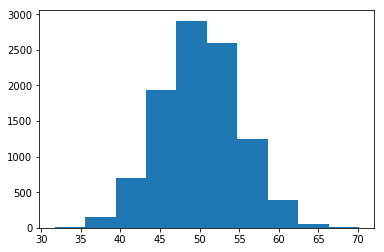

In [13]:
plt.hist(data)

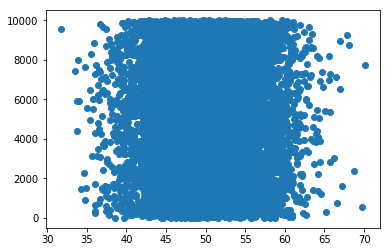

In [36]:
plt.scatter(data, y=range(0, len(data)))

In [10]:
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

In [56]:
# identify outliers
outliers = [x if (x < lower or x > upper) else np.nan for x in data]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 10000


In [57]:
# remove outliers
outliers_removed = [x if x >= lower and x <= upper else np.nan for x in data]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 10000


D:\Python35\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\Python35\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 124.,  351.,  913., 1537., 2016., 2062., 1534.,  840.,  425.,
         117.]),
 array([36.6793703 , 39.34796887, 42.01656744, 44.68516601, 47.35376458,
        50.02236315, 52.69096172, 55.3595603 , 58.02815887, 60.69675744,
        63.36535601]),
 <a list of 10 Patch objects>)

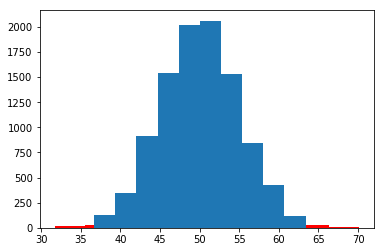

In [58]:
plt.hist(outliers, color='r')
plt.hist(outliers_removed)

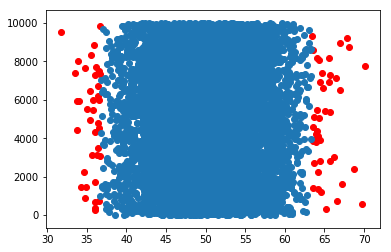

In [59]:
plt.scatter(outliers, y=range(0, len(outliers)), color='r')
plt.scatter(outliers_removed, y=range(0, len(outliers_removed)))